In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
Q = pd.read_csv('rates.tsv', engine='python', sep='\s\s+')
Q['$Q_i,~\l/\s$'] = 5 * Q['$N,~\\rev$']/Q['$\\tau,~\s$']

In [3]:
Q

,"$N,~\rev$","$\tau,~\s$","$Q_i,~\l/\s$"
0,3,165,0.090909
1,1,130,0.038462
2,2,133,0.075188


In [4]:
data = pd.read_csv('opdata.tsv', engine='python', sep='\s\s+')

data['$W,~\m\W$'] = data['$I,~\m\A$'] * data['$U,~\V$']
data['$\Delta T,~\CC$'] = data['$\mathscr{E},~\mk\V$']/42.3
data['$Q_i,~\l/\s$'] = data.apply(lambda row: Q.as_matrix()[int(row['$i$'])-1,2], axis=1)
data['$\\frac{W}{\Delta T},~\m\W/\CC$'] = data['$W,~\m\W$']/data['$\Delta T,~\CC$']

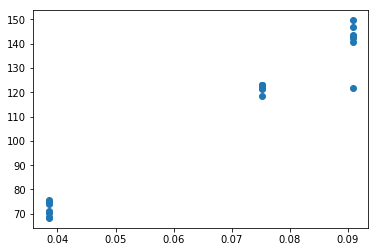

In [5]:
plt.plot(data['$Q_i,~\l/\s$'], data['$\\frac{W}{\Delta T},~\m\W/\CC$'], 'o')

In [6]:
data

,$i$,"$I,~\m\A$","$U,~\V$","$\mathscr{E},~\mk\V$","$W,~\m\W$","$\Delta T,~\CC$","$Q_i,~\l/\s$","$\frac{W}{\Delta T},~\m\W/\CC$"
0,1,77.17,2.682,72,206.96994,1.702128,0.090909,121.594840
1,1,99.83,3.470,103,346.41010,2.434988,0.090909,142.263565
2,1,123.14,4.282,149,527.28548,3.522459,0.090909,149.692455
3,1,141.25,4.914,200,694.10250,4.728132,0.090909,146.802679
4,1,160.09,5.571,263,891.86139,6.217494,0.090909,143.443866
5,1,177.02,6.163,322,1090.97426,7.612293,0.090909,143.317426
6,1,183.83,6.401,354,1176.69583,8.368794,0.090909,140.605180
7,2,49.23,1.714,52,84.38022,1.229314,0.038462,68.640064
8,2,80.01,2.788,126,223.06788,2.978723,0.038462,74.887074
9,2,99.19,3.457,192,342.89983,4.539007,0.038462,75.545119


[0] failed

In [7]:
from scipy import stats
stats.linregress(data['$Q_i,~\l/\s$'][1:], data['$\\frac{W}{\Delta T},~\m\W/\CC$'][1:])

LinregressResult(slope=1378.652091568176, intercept=18.67305948593058, rvalue=0.99651195342776733, pvalue=5.8255758153484529e-22, stderr=26.486371478989028)

In [8]:
with open('opdata.proc.tex', 'w') as output:
    output.write(data.to_latex(index=False, escape=False).replace('rrrrrrrr', 'cccc|cccc'))
with open('rates.proc.tex', 'w') as output:
    output.write(Q.to_latex(index=False, escape=False).replace('rrr', 'cc|c'))
with open('plot.proc.csv', 'w') as output:
    output.write(data[['$Q_i,~\l/\s$', '$\\frac{W}{\Delta T},~\m\W/\CC$']].to_csv(index=False, header=False))